In [ ]:
Theory
K-Means Clustering:
                   K-Means is used to group data points into K clusters based on similarity.

                  Each cluster has a centroid, and points are assigned to the nearest centroid.

Iterative process: Assign points → Update centroids → Repeat until convergence.

Applications: Customer segmentation, image compression, pattern recognition.

In [1]:
import numpy as np

# Sample dataset
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

# K-Means parameters
K = 2
centroids = X[:K]  # Initialize first K points as centroids
for _ in range(10):  # Iterate
    # Assign clusters
    clusters = []
    for x in X:
        distances = [np.linalg.norm(x - c) for c in centroids]
        clusters.append(np.argmin(distances))
    clusters = np.array(clusters)
    
    # Update centroids
    for k in range(K):
        centroids[k] = X[clusters == k].mean(axis=0)

print("Final centroids:", centroids)
print("Cluster assignments:", clusters)


Final centroids: [[2 0]
 [3 3]]
Cluster assignments: [0 1 0 1 1 0]


In [2]:
from sklearn.cluster import KMeans

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

print("Final centroids:", model.cluster_centers_)
print("Cluster assignments:", model.labels_)


Final centroids: [[2.         0.66666667]
 [3.         3.33333333]]
Cluster assignments: [0 1 0 1 1 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
Theory
Hierarchical Clustering:
                         Hierarchical Clustering ek unsupervised learning algorithm hai jo data ko tree-like structure (dendrogram) me cluster karta hai.

Types:

Agglomerative (Bottom-up): Har point apna cluster start karta hai, phir closest clusters merge hote hain.

Divisive (Top-down): Sare points ek cluster me hote hain, phir recursively split hote hain.

Applications: Gene expression analysis, document clustering, customer segmentation.

In [4]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = model.fit_predict(X)

print("Cluster assignments:", clusters)


Cluster assignments: [1 1 1 0 0 0]


In [5]:
import numpy as np
from scipy.spatial.distance import cdist

# Simple dataset
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

# Initially, each point is its own cluster
clusters = [[i] for i in range(len(X))]

def compute_distance(c1, c2):
    # Use single-linkage: minimum distance between points of clusters
    return np.min(cdist(X[c1], X[c2]))

# Merge clusters iteratively until 2 remain
while len(clusters) > 2:
    min_dist = float('inf')
    pair_to_merge = (0,1)
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dist = compute_distance(clusters[i], clusters[j])
            if dist < min_dist:
                min_dist = dist
                pair_to_merge = (i,j)
    # Merge clusters
    i,j = pair_to_merge
    clusters[i] = clusters[i] + clusters[j]
    clusters.pop(j)

print("Final clusters:", clusters)


Final clusters: [[0, 1, 2], [3, 4, 5]]


In [ ]:
Theory
DBSCAN:
       DBSCAN ek unsupervised learning algorithm hai jo dense regions me clusters identify karta hai.

Key concepts:

ε (eps): Maximum distance between two samples to be considered neighbors.

MinPts: Minimum number of points required to form a dense region (cluster).

Core, Border, Noise points:

Core: Dense point (>= MinPts in ε-neighborhood)

Border: Neighbor of core point, but not dense itself

Noise: Outlier, not part of any cluster

Applications: Outlier detection, spatial data analysis, anomaly detection.

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN

# Sample dataset
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

# DBSCAN model
model = DBSCAN(eps=1.5, min_samples=2)
clusters = model.fit_predict(X)

print("Cluster assignments:", clusters)


Cluster assignments: [-1 -1 -1 -1 -1 -1]


In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Dataset
X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

eps = 1.5
min_pts = 2
n = X.shape[0]
labels = np.full(n, -1)  # -1 means noise
cluster_id = 0

# Distance matrix
dist_matrix = pairwise_distances(X)

for i in range(n):
    if labels[i] != -1:
        continue
    neighbors = np.where(dist_matrix[i] <= eps)[0]
    if len(neighbors) < min_pts:
        labels[i] = -1  # noise
    else:
        labels[i] = cluster_id
        seeds = set(neighbors)
        seeds.discard(i)
        while seeds:
            j = seeds.pop()
            if labels[j] == -1:
                labels[j] = cluster_id
            elif labels[j] == -1 or labels[j] == -1:
                labels[j] = cluster_id
                j_neighbors = np.where(dist_matrix[j] <= eps)[0]
                if len(j_neighbors) >= min_pts:
                    seeds.update(j_neighbors)
        cluster_id += 1

print("Cluster assignments (scratch):", labels)


Cluster assignments (scratch): [-1 -1 -1 -1 -1 -1]


In [ ]:
Theory
K-Means Clustering: 
                Partition-based clustering algorithm

                Divides data into k clusters based on distance to centroids

                Minimizes within-cluster variance


In [8]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
model = KMeans(n_clusters=2, random_state=42)
model.fit(X)

print("Final centroids:", model.cluster_centers_)
print("Cluster assignments:", model.labels_)


Final centroids: [[2.         0.66666667]
 [3.         3.33333333]]
Cluster assignments: [0 1 0 1 1 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
Theory
Hierarchical Clustering:
                        Builds hierarchy of clusters (dendrogram)

Agglomerative: Start with single points → merge clusters

Divisive: Start with all points → split clusters

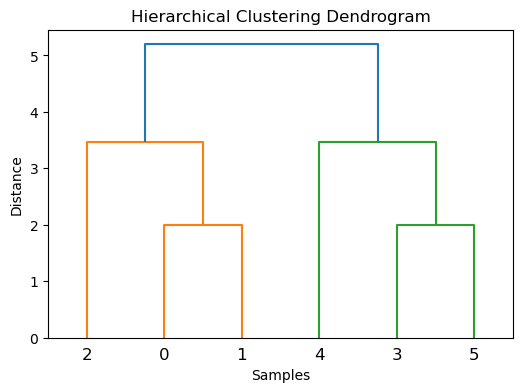

Cluster assignments: [1 1 1 0 0 0]


In [9]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])

# Dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(6,4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = model.fit_predict(X)
print("Cluster assignments:", clusters)


In [ ]:
Theory
DBSCAN (Density-Based Spatial Clustering):
                                        Detects dense regions as clusters

Parameters: eps (distance), MinPts (minimum points)

Identifies: Core points, Border points, Noise points


In [10]:
import numpy as np
from sklearn.cluster import DBSCAN

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
model = DBSCAN(eps=1.5, min_samples=2)
clusters = model.fit_predict(X)

print("Cluster assignments:", clusters)


Cluster assignments: [-1 -1 -1 -1 -1 -1]


In [11]:
import numpy as np
from sklearn.metrics import pairwise_distances

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
eps = 1.5
min_pts = 2
n = X.shape[0]
labels = np.full(n, -1)
cluster_id = 0
dist_matrix = pairwise_distances(X)

for i in range(n):
    if labels[i] != -1:
        continue
    neighbors = np.where(dist_matrix[i] <= eps)[0]
    if len(neighbors) < min_pts:
        labels[i] = -1
    else:
        labels[i] = cluster_id
        seeds = set(neighbors)
        seeds.discard(i)
        while seeds:
            j = seeds.pop()
            if labels[j] == -1:
                labels[j] = cluster_id
            elif labels[j] == -1 or labels[j] == -1:
                labels[j] = cluster_id
                j_neighbors = np.where(dist_matrix[j] <= eps)[0]
                if len(j_neighbors) >= min_pts:
                    seeds.update(j_neighbors)
        cluster_id += 1

print("Cluster assignments (scratch):", labels)


Cluster assignments (scratch): [-1 -1 -1 -1 -1 -1]
